# Regression

## Data creation

In [ ]:
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
import torch

In [ ]:
m = 100
X = 2 * torch.rand(m, 1)
y = 4 + 3 * X + torch.randn(m, 1)

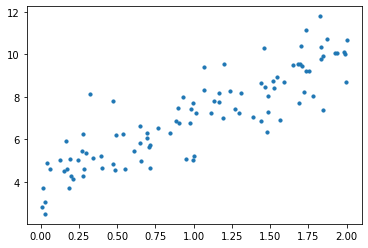

In [ ]:
plt.scatter(X, y, s=10)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

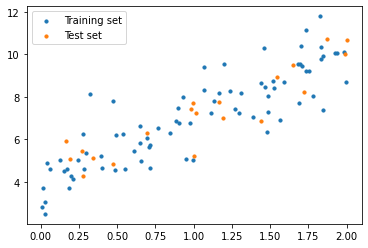

In [ ]:
plt.scatter(X_train, y_train, s=10)
plt.scatter(X_test, y_test, s=10)
plt.legend(['Training set', 'Test set'])

## Regression model

In [ ]:
X_train_3 = X_train[:3]
y_train_3 = y_train[:3]

In [ ]:
X_train_3, y_train_3

(tensor([[1.7067],
         [1.5265],
         [0.5538]]), tensor([[9.4494],
         [8.4113],
         [4.5896]]))

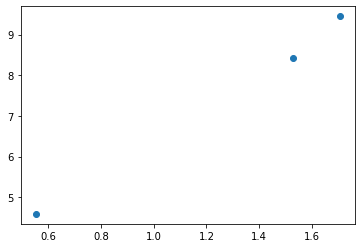

In [ ]:
plt.scatter(X_train_3, y_train_3)

### Hypothesis  
H(x) = Wx+b

In [ ]:
W = torch.zeros(1, requires_grad=True)
b = torch.zeros(1, requires_grad=True)
hypothesis = X_train_3 * W + b

In [ ]:
hypothesis

tensor([[0.],
        [0.],
        [0.]], grad_fn=<AddBackward0>)

### Compute loss

cost(W, b) = mean((H(x) - y)^2)

In [ ]:
cost = torch.mean((hypothesis - y_train_3) ** 2)

In [ ]:
cost

tensor(60.3686, grad_fn=<MeanBackward0>)

### Gradient descent

#### 미분으로 계산

In [ ]:
y_train_3

tensor([[9.4494],
        [8.4113],
        [4.5896]])

In [ ]:
## dC/dW
sum((2/3) * ((W * X_train_3 + b) - y_train_3) * X_train_3)

tensor([-21.0059], grad_fn=<AddBackward0>)

In [ ]:
## dC/db
sum((2/3) * ((W * X_train_3 + b) - y_train_3))

tensor([-14.9669], grad_fn=<AddBackward0>)

#### torch.optim 라이브러리 활용

In [ ]:
import torch.optim as optim

Optimizer 설정 - Stochastic gradient descent 를 활용하여 W와 b를 최적화.  
learning rate=0.01

In [ ]:
optimizer = optim.SGD([W, b], lr=0.01)

최적화 과정 - 3가지가 항상 붙어다님. 

In [ ]:
hypothesis = X_train_3 * W + b
cost = torch.mean((hypothesis - y_train_3) ** 2)

In [ ]:
optimizer.zero_grad() # 모든 gradient를 0으로 초기화
cost.backward(retain_graph=True) # gradient 계산하여 (parameters).grad를 저장
optimizer.step() # step으로 parameter를 개선

gradient 확인

In [ ]:
W.grad, b.grad

(tensor([-21.0059]), tensor([-14.9669]))

In [ ]:
print(W, b)

tensor([0.2101], requires_grad=True) tensor([0.1497], requires_grad=True)


#### 1 step이후 확인

In [ ]:
hypothesis = X_train_3 * W + b
hypothesis

tensor([[0.5082],
        [0.4703],
        [0.2660]], grad_fn=<AddBackward0>)

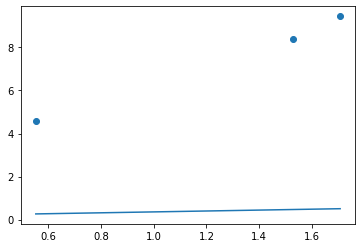

In [ ]:
plt.scatter(X_train_3, y_train_3)
plt.plot(X_train_3, hypothesis.detach().numpy())

### Training with Full code

In [ ]:
# Data setup
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Model initialize
W = torch.zeros(1, requires_grad=True)
b = torch.zeros(1, requires_grad=True)

# Set optimizer
optimizer = optim.SGD([W, b], lr=0.01)

nb_epochs = 1000
for epoch in range(nb_epochs + 1):
    # Calculate H(X)
    hypothesis = X_train * W + b
#     hypothesis = X_train_3 * W + b
    
    # Calculate cost
    cost = torch.mean((hypothesis - y_train) ** 2)
#     cost = torch.mean((hypothesis - y_train_3) ** 2)
    
    # Parameter gradient descent
    optimizer.zero_grad()
    cost.backward() 
    optimizer.step() 
    
    if epoch % 20 == 0:
        print('Epoch {:4d}/{} W: {:.3f}, b: {:.3f} Cost: {:.6f}'.format(
            epoch, nb_epochs, W.item(), b.item(), cost.item()
        ))

Epoch    0/1000 W: 0.160, b: 0.140 Cost: 53.038891
Epoch   20/1000 W: 2.212, b: 1.972 Cost: 9.947540
Epoch   40/1000 W: 3.026, b: 2.758 Cost: 2.665808
Epoch   60/1000 W: 3.333, b: 3.112 Cost: 1.417548
Epoch   80/1000 W: 3.434, b: 3.287 Cost: 1.188125
Epoch  100/1000 W: 3.453, b: 3.386 Cost: 1.132732
Epoch  120/1000 W: 3.439, b: 3.452 Cost: 1.108790
Epoch  140/1000 W: 3.413, b: 3.504 Cost: 1.092014
Epoch  160/1000 W: 3.383, b: 3.547 Cost: 1.078076
Epoch  180/1000 W: 3.354, b: 3.586 Cost: 1.066038
Epoch  200/1000 W: 3.325, b: 3.622 Cost: 1.055560
Epoch  220/1000 W: 3.298, b: 3.655 Cost: 1.046426
Epoch  240/1000 W: 3.272, b: 3.685 Cost: 1.038461
Epoch  260/1000 W: 3.249, b: 3.714 Cost: 1.031516
Epoch  280/1000 W: 3.226, b: 3.740 Cost: 1.025460
Epoch  300/1000 W: 3.205, b: 3.765 Cost: 1.020178
Epoch  320/1000 W: 3.186, b: 3.788 Cost: 1.015573
Epoch  340/1000 W: 3.168, b: 3.810 Cost: 1.011556
Epoch  360/1000 W: 3.151, b: 3.830 Cost: 1.008054
Epoch  380/1000 W: 3.135, b: 3.849 Cost: 1.005000

In [ ]:
hx = (X_train * W + b).detach().numpy()

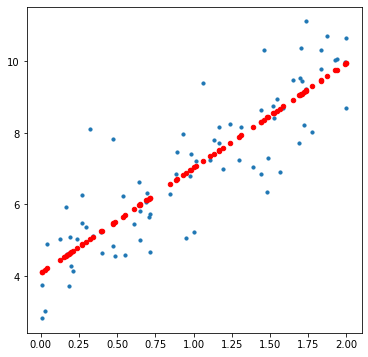

In [ ]:
plt.figure(figsize=[6, 6])
plt.scatter(X_train, y_train, s=10)
plt.scatter(X_train, hx, s=20, c='r')

## High level implementation with nn.Module

`nn.module`을 활용하여 모델 구축  
`nn.module`: 신경망 모듈. 각종 레이어(linear, conv, ...)를 지원하며 output을 return하는 forward(input) 메서드를 포함함

In [ ]:
from torch import nn as nn
from torch.nn import functional as F

nn.Linear 레이어의 활용

In [ ]:
class my_LinearRegression(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear = nn.Linear(1, 1)

    def forward(self, x):
        return self.linear(x)

In [ ]:
model = my_LinearRegression()

In [ ]:
model

my_LinearRegression(
  (linear): Linear(in_features=1, out_features=1, bias=True)
)

In [ ]:
hypothesis = model(X_train[:3])

In [ ]:
hypothesis

tensor([[ 0.4109],
        [-0.4739],
        [-0.2649]], grad_fn=<AddmmBackward>)

In [ ]:
hypothesis = model(X_train)
cost = F.mse_loss(hypothesis, y_train)

In [ ]:
cost

tensor(55.6750, grad_fn=<MseLossBackward>)

In [ ]:
optimizer = optim.SGD(model.parameters(), lr=0.01)

In [ ]:
optimizer.zero_grad()
cost.backward()
optimizer.step()

### Training with Full code

In [ ]:
# Data setup
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Model initialize
model = my_LinearRegression()

# Set optimizer
optimizer = optim.SGD(model.parameters(), lr=0.01)

nb_epochs = 1000
for epoch in range(nb_epochs + 1):
    # Calculate H(X)
    hypothesis = model(X_train)
    
    # Calculate cost
    cost = F.mse_loss(hypothesis, y_train)
    
    # Parameter gradient descent
    optimizer.zero_grad()
    cost.backward() 
    optimizer.step() 
    
    if epoch % 20 == 0:
        params = list(model.parameters())
        W = params[0].item()
        b = params[1].item()
        print('Epoch {:4d}/{} W: {:.3f}, b: {:.3f} Cost: {:.6f}'.format(
            epoch, nb_epochs, W, b, cost.item()
        ))

Epoch    0/1000 W: 0.946, b: 0.348 Cost: 37.520115
Epoch   20/1000 W: 2.637, b: 1.902 Cost: 7.496470
Epoch   40/1000 W: 3.293, b: 2.581 Cost: 2.423627
Epoch   60/1000 W: 3.528, b: 2.899 Cost: 1.537814
Epoch   80/1000 W: 3.592, b: 3.067 Cost: 1.358345
Epoch  100/1000 W: 3.589, b: 3.171 Cost: 1.301265
Epoch  120/1000 W: 3.561, b: 3.246 Cost: 1.268185
Epoch  140/1000 W: 3.523, b: 3.308 Cost: 1.242164
Epoch  160/1000 W: 3.484, b: 3.361 Cost: 1.219972
Epoch  180/1000 W: 3.446, b: 3.410 Cost: 1.200723
Epoch  200/1000 W: 3.410, b: 3.455 Cost: 1.183975
Epoch  220/1000 W: 3.375, b: 3.496 Cost: 1.169392
Epoch  240/1000 W: 3.343, b: 3.535 Cost: 1.156693
Epoch  260/1000 W: 3.313, b: 3.571 Cost: 1.145634
Epoch  280/1000 W: 3.285, b: 3.605 Cost: 1.136003
Epoch  300/1000 W: 3.259, b: 3.636 Cost: 1.127617
Epoch  320/1000 W: 3.234, b: 3.665 Cost: 1.120313
Epoch  340/1000 W: 3.212, b: 3.692 Cost: 1.113953
Epoch  360/1000 W: 3.190, b: 3.718 Cost: 1.108415
Epoch  380/1000 W: 3.170, b: 3.742 Cost: 1.103592

### 결과 확인

In [ ]:
hx = (model(X_train)).detach().numpy()

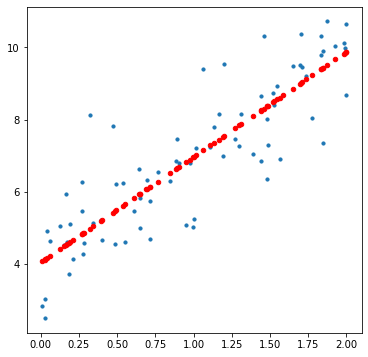

In [ ]:
plt.figure(figsize=[6, 6])
plt.scatter(X_train, y_train, s=10)
plt.scatter(X_train, hx, s=20, c='r')

## Multivariate Linear Regression

In [ ]:
m = 100
x1 = torch.rand(m, 1)
x2 = 2 * torch.rand(m, 1)
x3 = 3 * torch.rand(m, 1)
X = torch.cat((x1, x2, x3), axis=1)
y = 4 + 3 * x1 + 2 * x2 + 5 * x3 + torch.randn(m, 1)

In [ ]:
X.shape, y.shape

(torch.Size([100, 3]), torch.Size([100, 1]))

In [ ]:
class MultivariateLinearRegressionModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear = nn.Linear(3, 1)

    def forward(self, x):
        return self.linear(x)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

model = MultivariateLinearRegressionModel()

# Set optimizer
optimizer = optim.SGD(model.parameters(), lr=0.01)

nb_epochs = 2000
for epoch in range(nb_epochs + 1):
    # Calculate H(X)
    hypothesis = model(X_train)
    
    # Calculate cost
    cost = F.mse_loss(hypothesis, y_train)
    
    # Parameter gradient descent
    optimizer.zero_grad()
    cost.backward() 
    optimizer.step() 
    
    if epoch % 20 == 0:
        params = list(model.parameters())
       
        print('Epoch {:4d}/{} {} Cost: {:.6f}'.format(
            epoch, nb_epochs, list(model.parameters()), cost.item()
        ))

Epoch    0/2000 [Parameter containing:
tensor([[-0.0884,  0.0534,  0.0660]], requires_grad=True), Parameter containing:
tensor([0.6565], requires_grad=True)] Cost: 289.553070
Epoch   20/2000 [Parameter containing:
tensor([[1.1863, 2.4604, 4.7005]], requires_grad=True), Parameter containing:
tensor([3.1468], requires_grad=True)] Cost: 5.294409
Epoch   40/2000 [Parameter containing:
tensor([[1.3738, 2.6122, 5.2532]], requires_grad=True), Parameter containing:
tensor([3.4503], requires_grad=True)] Cost: 1.672374
Epoch   60/2000 [Parameter containing:
tensor([[1.4377, 2.5288, 5.3444]], requires_grad=True), Parameter containing:
tensor([3.5116], requires_grad=True)] Cost: 1.539234
Epoch   80/2000 [Parameter containing:
tensor([[1.4851, 2.4322, 5.3775]], requires_grad=True), Parameter containing:
tensor([3.5463], requires_grad=True)] Cost: 1.468914
Epoch  100/2000 [Parameter containing:
tensor([[1.5282, 2.3454, 5.3987]], requires_grad=True), Parameter containing:
tensor([3.5780], requires_gr

### 결과 확인

In [ ]:
from sklearn.decomposition import PCA

In [ ]:
pca = PCA(n_components=1)
X_pca = pca.fit_transform(X_train)

In [ ]:
hx = model(X_train).detach().numpy()

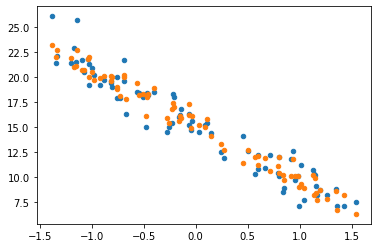

In [ ]:
plt.scatter(X_pca, y_train, s=20)
plt.scatter(X_pca, hx, s=20)